In [1]:
import os
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
data_dir = "archive/images/images"
print(os.listdir(data_dir))

['train', 'validation']


In [3]:
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "validation")
test_dir = os.path.join(data_dir, "validation")

print("Contents of train directory:")
print(os.listdir(train_dir))

print("Contents of validation directory:")
print(os.listdir(val_dir))

print("Contents of test directory:")
print(os.listdir(test_dir))

Contents of train directory:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Contents of validation directory:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Contents of test directory:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

img_size = (48, 48)
batch_size = 128

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False
)


"""
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False
)
"""




Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


'\ntest_datagen = ImageDataGenerator(rescale=1./255)\n\ntest_generator = test_datagen.flow_from_directory(\n    test_dir,\n    target_size=img_size,\n    batch_size=batch_size,\n    color_mode="grayscale",\n    class_mode="categorical",\n    shuffle=False\n)\n'

In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    

    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 48, 48, 32)       1

Epoch 1/15
226/226 [==============================] - 150s 649ms/step - loss: 1.7528 - accuracy: 0.3353 - val_loss: 2.1248 - val_accuracy: 0.1722
Epoch 2/15
226/226 [==============================] - 135s 597ms/step - loss: 1.4199 - accuracy: 0.4545 - val_loss: 1.6050 - val_accuracy: 0.3629
Epoch 3/15
226/226 [==============================] - 135s 596ms/step - loss: 1.3106 - accuracy: 0.5013 - val_loss: 1.5690 - val_accuracy: 0.4125
Epoch 4/15
226/226 [==============================] - 135s 599ms/step - loss: 1.2392 - accuracy: 0.5329 - val_loss: 1.4231 - val_accuracy: 0.4943
Epoch 5/15
226/226 [==============================] - 134s 594ms/step - loss: 1.1516 - accuracy: 0.5712 - val_loss: 1.3173 - val_accuracy: 0.5088
Epoch 6/15
226/226 [==============================] - 138s 611ms/step - loss: 1.0668 - accuracy: 0.6094 - val_loss: 1.4539 - val_accuracy: 0.4874
Epoch 7/15
226/226 [==============================] - 136s 602ms/step - loss: 0.9820 - accuracy: 0.6458 - val_loss: 2.0168 -

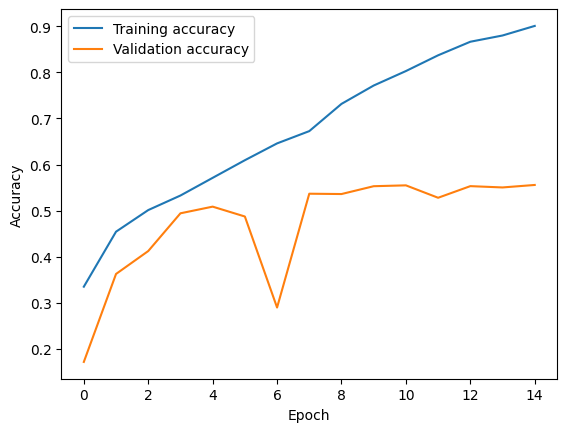

In [11]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.003),
    metrics=['accuracy']
)

# Train the model
epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

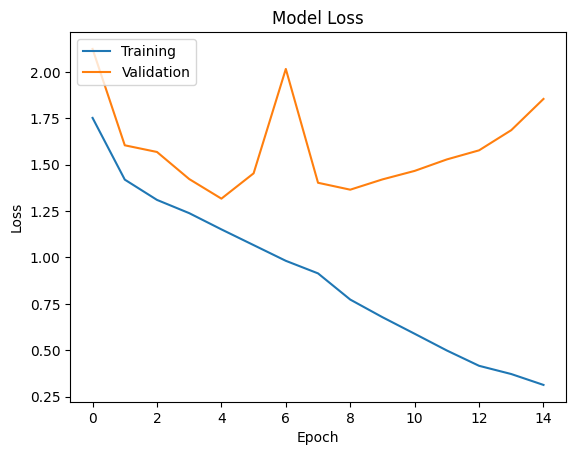

In [15]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 32)      

In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/30
226/226 [==============================] - 149s 644ms/step - loss: 1.8916 - accuracy: 0.3197 - val_loss: 2.3560 - val_accuracy: 0.1681
Epoch 2/30
226/226 [==============================] - 147s 652ms/step - loss: 1.4483 - accuracy: 0.4460 - val_loss: 1.7602 - val_accuracy: 0.2597
Epoch 3/30
226/226 [==============================] - 152s 673ms/step - loss: 1.3460 - accuracy: 0.4894 - val_loss: 1.4984 - val_accuracy: 0.4519
Epoch 4/30
226/226 [==============================] - 5540s 25s/step - loss: 1.2519 - accuracy: 0.5237 - val_loss: 1.3283 - val_accuracy: 0.4871
Epoch 5/30
226/226 [==============================] - 1569s 7s/step - loss: 1.1976 - accuracy: 0.5499 - val_loss: 1.3464 - val_accuracy: 0.4866
Epoch 6/30
 97/226 [===========>..................] - ETA: 1:01 - loss: 1.1153 - accuracy: 0.5839

In [19]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/30
226/226 [==============================] - 69s 299ms/step - loss: 0.4457 - accuracy: 0.8536 - val_loss: 1.6702 - val_accuracy: 0.5381
Epoch 2/30
226/226 [==============================] - 69s 305ms/step - loss: 0.3822 - accuracy: 0.8745 - val_loss: 1.6911 - val_accuracy: 0.5294
Epoch 3/30
226/226 [==============================] - 68s 300ms/step - loss: 0.3437 - accuracy: 0.8875 - val_loss: 1.7733 - val_accuracy: 0.5335
Epoch 4/30
226/226 [==============================] - 67s 297ms/step - loss: 0.3108 - accuracy: 0.8970 - val_loss: 1.8547 - val_accuracy: 0.5357
Epoch 5/30
226/226 [==============================] - 68s 302ms/step - loss: 0.2904 - accuracy: 0.9043 - val_loss: 1.9872 - val_accuracy: 0.5304
Epoch 6/30
226/226 [==============================] - 69s 306ms/step - loss: 0.2535 - accuracy: 0.9169 - val_loss: 1.8942 - val_accuracy: 0.5494
Epoch 7/30
226/226 [==============================] - 69s 305ms/step - loss: 0.2388 - accuracy: 0.9225 - val_loss: 1.9470 - val_ac

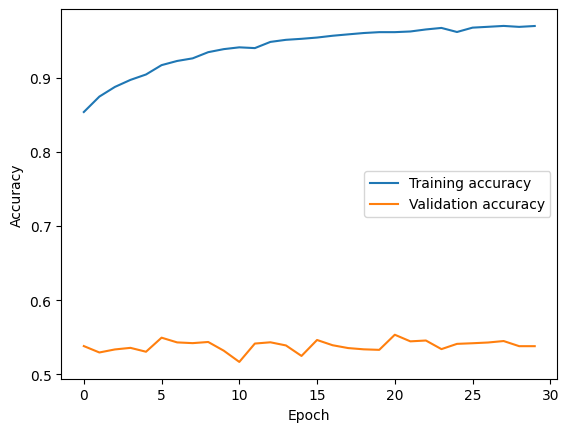

In [22]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                        

Epoch 1/50
226/226 [==============================] - 46s 185ms/step - loss: 2.3242 - accuracy: 0.2161 - val_loss: 1.9709 - val_accuracy: 0.1833
Epoch 2/50
226/226 [==============================] - 40s 176ms/step - loss: 1.7741 - accuracy: 0.3207 - val_loss: 1.6785 - val_accuracy: 0.3375
Epoch 3/50
226/226 [==============================] - 40s 175ms/step - loss: 1.5787 - accuracy: 0.3868 - val_loss: 1.6257 - val_accuracy: 0.3803
Epoch 4/50
226/226 [==============================] - 38s 170ms/step - loss: 1.4835 - accuracy: 0.4223 - val_loss: 1.4187 - val_accuracy: 0.4469
Epoch 5/50
226/226 [==============================] - 38s 169ms/step - loss: 1.4207 - accuracy: 0.4514 - val_loss: 1.3623 - val_accuracy: 0.4755
Epoch 6/50
226/226 [==============================] - 39s 171ms/step - loss: 1.3779 - accuracy: 0.4722 - val_loss: 1.3270 - val_accuracy: 0.4894
Epoch 7/50
226/226 [==============================] - 39s 170ms/step - loss: 1.3340 - accuracy: 0.4922 - val_loss: 1.3642 - val_ac

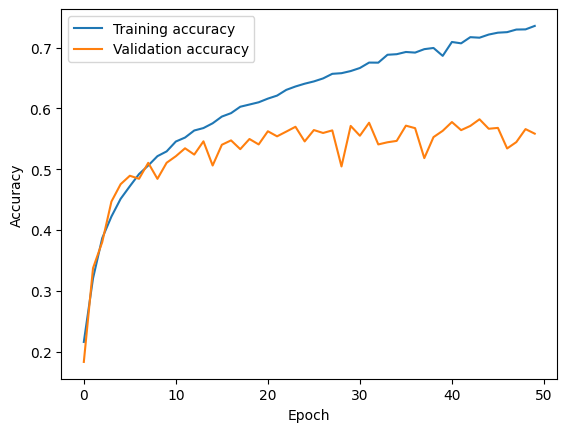

In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

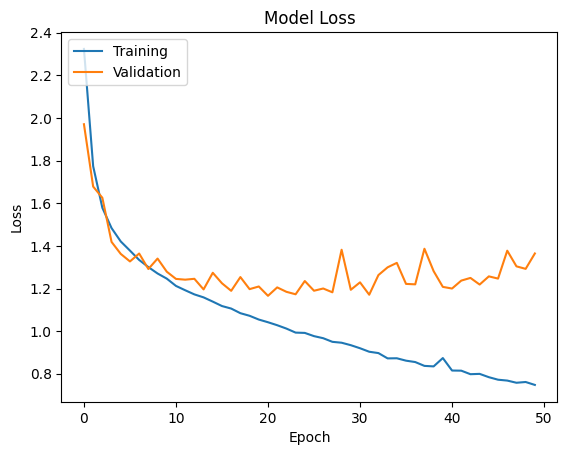

In [10]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [10]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(7, activation='softmax')
])
model.summary()

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Test accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

img_size = (48, 48)
batch_size = 128

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(500, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(500, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                        

Epoch 1/30
226/226 [==============================] - 85s 368ms/step - loss: 2.2537 - accuracy: 0.2598 - val_loss: 2.2089 - val_accuracy: 0.1722
Epoch 2/30
226/226 [==============================] - 79s 351ms/step - loss: 1.6381 - accuracy: 0.3790 - val_loss: 1.7767 - val_accuracy: 0.3551
Epoch 3/30
226/226 [==============================] - 80s 352ms/step - loss: 1.4342 - accuracy: 0.4468 - val_loss: 1.7276 - val_accuracy: 0.4151
Epoch 4/30
226/226 [==============================] - 80s 356ms/step - loss: 1.3296 - accuracy: 0.4914 - val_loss: 1.5369 - val_accuracy: 0.4454
Epoch 5/30
226/226 [==============================] - 80s 356ms/step - loss: 1.2685 - accuracy: 0.5159 - val_loss: 1.5087 - val_accuracy: 0.4546
Epoch 6/30
226/226 [==============================] - 81s 356ms/step - loss: 1.2189 - accuracy: 0.5306 - val_loss: 1.3188 - val_accuracy: 0.4870
Epoch 7/30
226/226 [==============================] - 80s 353ms/step - loss: 1.1755 - accuracy: 0.5553 - val_loss: 1.2152 - val_ac

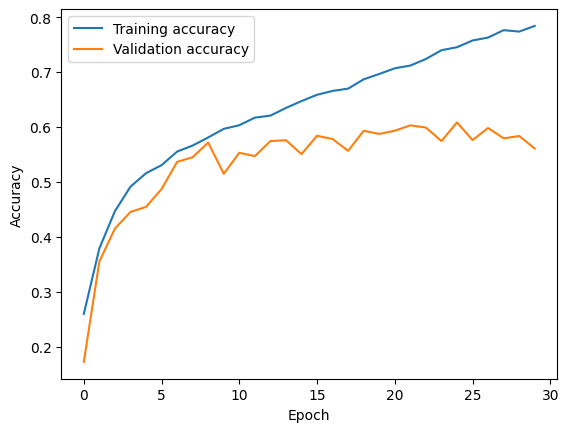

In [11]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                      

In [8]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                        

Epoch 1/50
226/226 [==============================] - 55s 226ms/step - loss: 2.0296 - accuracy: 0.2427 - val_loss: 2.0018 - val_accuracy: 0.2583
Epoch 2/50
226/226 [==============================] - 50s 221ms/step - loss: 1.6919 - accuracy: 0.3393 - val_loss: 1.8593 - val_accuracy: 0.2829
Epoch 3/50
226/226 [==============================] - 49s 215ms/step - loss: 1.5473 - accuracy: 0.3969 - val_loss: 1.5359 - val_accuracy: 0.3920
Epoch 4/50
226/226 [==============================] - 49s 219ms/step - loss: 1.4632 - accuracy: 0.4337 - val_loss: 1.3931 - val_accuracy: 0.4615
Epoch 5/50
226/226 [==============================] - 48s 210ms/step - loss: 1.4064 - accuracy: 0.4607 - val_loss: 1.4401 - val_accuracy: 0.4387
Epoch 6/50
226/226 [==============================] - 48s 211ms/step - loss: 1.3552 - accuracy: 0.4827 - val_loss: 1.2887 - val_accuracy: 0.5076
Epoch 7/50
226/226 [==============================] - 48s 210ms/step - loss: 1.3201 - accuracy: 0.4937 - val_loss: 1.2659 - val_ac

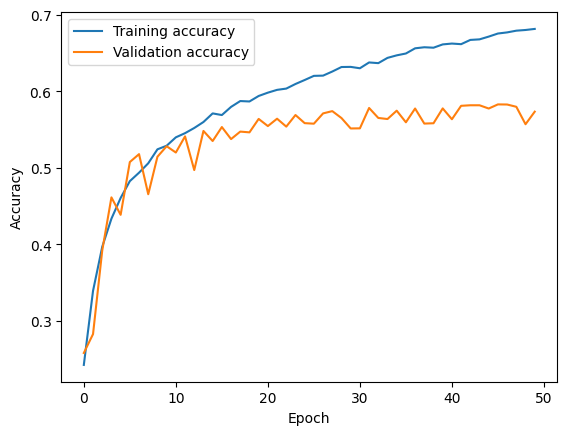

In [10]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/30
226/226 [==============================] - 39s 165ms/step - loss: 2.3567 - accuracy: 0.2022 - val_loss: 1.9584 - val_accuracy: 0.2584
Epoch 2/30
226/226 [==============================] - 36s 161ms/step - loss: 1.8230 - accuracy: 0.2953 - val_loss: 1.7732 - val_accuracy: 0.2948
Epoch 3/30
226/226 [==============================] - 38s 166ms/step - loss: 1.6289 - accuracy: 0.3647 - val_loss: 1.5735 - val_accuracy: 0.3939
Epoch 4/30
226/226 [==============================] - 37s 164ms/step - loss: 1.5278 - accuracy: 0.4071 - val_loss: 1.6241 - val_accuracy: 0.3900
Epoch 5/30
226/226 [==============================] - 37s 162ms/step - loss: 1.4652 - accuracy: 0.4353 - val_loss: 1.3909 - val_accuracy: 0.4602
Epoch 6/30
226/226 [==============================] - 37s 166ms/step - loss: 1.4086 - accuracy: 0.4588 - val_loss: 1.5183 - val_accuracy: 0.4250
Epoch 7/30
226/226 [==============================] - 36s 161ms/step - loss: 1.3649 - accuracy: 0.4758 - val_loss: 1.4233 - val_ac

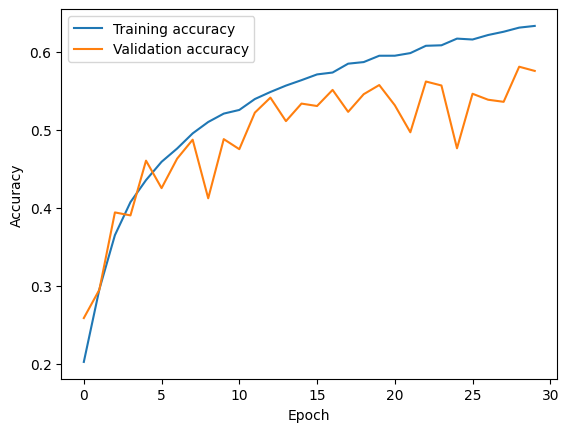

In [14]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)



# Train the model
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    

    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(300, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                        

Epoch 1/30
226/226 [==============================] - 74s 310ms/step - loss: 1.9172 - accuracy: 0.2574 - val_loss: 1.8808 - val_accuracy: 0.2821
Epoch 2/30
226/226 [==============================] - 47s 209ms/step - loss: 1.5706 - accuracy: 0.3855 - val_loss: 1.7427 - val_accuracy: 0.3307
Epoch 3/30
226/226 [==============================] - 48s 212ms/step - loss: 1.4708 - accuracy: 0.4270 - val_loss: 1.5719 - val_accuracy: 0.3583
Epoch 4/30
226/226 [==============================] - 48s 210ms/step - loss: 1.4038 - accuracy: 0.4568 - val_loss: 1.4933 - val_accuracy: 0.4106
Epoch 5/30
226/226 [==============================] - 47s 210ms/step - loss: 1.3637 - accuracy: 0.4806 - val_loss: 1.4277 - val_accuracy: 0.4469
Epoch 6/30
226/226 [==============================] - 49s 214ms/step - loss: 1.3165 - accuracy: 0.4977 - val_loss: 1.3699 - val_accuracy: 0.4691
Epoch 7/30
226/226 [==============================] - 46s 205ms/step - loss: 1.2728 - accuracy: 0.5175 - val_loss: 1.4371 - val_ac

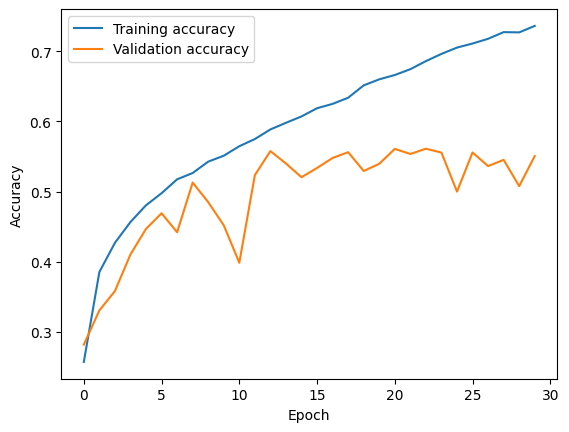

In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    metrics=['accuracy']
)



# Train the model
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/50
226/226 [==============================] - 50s 207ms/step - loss: 0.7514 - accuracy: 0.7318 - val_loss: 1.3146 - val_accuracy: 0.5638
Epoch 2/50
226/226 [==============================] - 46s 202ms/step - loss: 0.7399 - accuracy: 0.7380 - val_loss: 1.2974 - val_accuracy: 0.5665
Epoch 3/50
226/226 [==============================] - 47s 207ms/step - loss: 0.7126 - accuracy: 0.7492 - val_loss: 1.3537 - val_accuracy: 0.5539
Epoch 4/50
226/226 [==============================] - 3848s 17s/step - loss: 0.6711 - accuracy: 0.7664 - val_loss: 1.3299 - val_accuracy: 0.5701
Epoch 5/50
226/226 [==============================] - 22555s 100s/step - loss: 0.6723 - accuracy: 0.7623 - val_loss: 1.3592 - val_accuracy: 0.5631
Epoch 6/50
226/226 [==============================] - 42s 185ms/step - loss: 0.6581 - accuracy: 0.7697 - val_loss: 1.3586 - val_accuracy: 0.5620
Epoch 7/50
226/226 [==============================] - 53s 233ms/step - loss: 0.6420 - accuracy: 0.7781 - val_loss: 1.4061 - val_

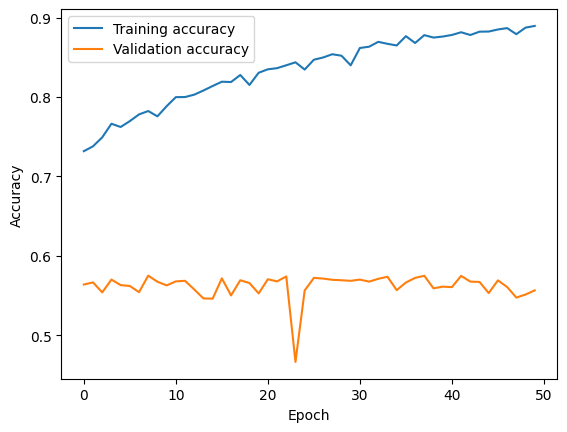

In [24]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)



# Train the model
epochs=50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),
    

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       73856     
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 128)     

In [26]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),   
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_32 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 flatten_9 (Flatten)         (None, 18432)             0         
                                                                 
 dense_18 (Dense)            (None, 200)              

Epoch 1/50
226/226 [==============================] - 35s 153ms/step - loss: 1.8088 - accuracy: 0.3461 - val_loss: 1.8624 - val_accuracy: 0.2948
Epoch 2/50
226/226 [==============================] - 34s 152ms/step - loss: 1.5373 - accuracy: 0.4114 - val_loss: 1.5700 - val_accuracy: 0.3871
Epoch 3/50
226/226 [==============================] - 33s 146ms/step - loss: 1.4593 - accuracy: 0.4370 - val_loss: 1.4362 - val_accuracy: 0.4471
Epoch 4/50
226/226 [==============================] - 35s 156ms/step - loss: 1.4198 - accuracy: 0.4541 - val_loss: 29.3173 - val_accuracy: 0.2222
Epoch 5/50
226/226 [==============================] - 42s 184ms/step - loss: 1.3989 - accuracy: 0.4641 - val_loss: 1.4275 - val_accuracy: 0.4544
Epoch 6/50
226/226 [==============================] - 46s 205ms/step - loss: 1.3668 - accuracy: 0.4775 - val_loss: 1.3817 - val_accuracy: 0.4703
Epoch 7/50
226/226 [==============================] - 46s 203ms/step - loss: 1.3419 - accuracy: 0.4859 - val_loss: 1.3408 - val_a

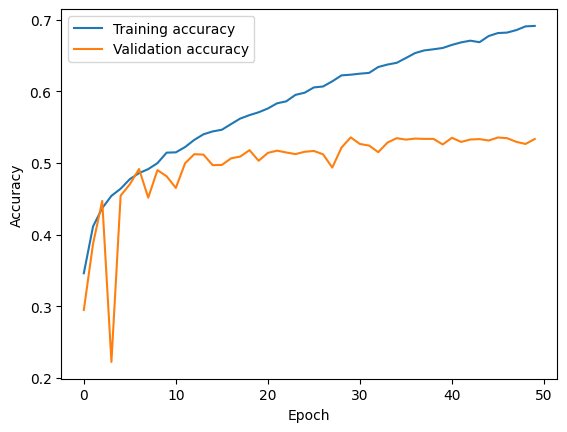

In [28]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)



# Train the model
epochs=50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

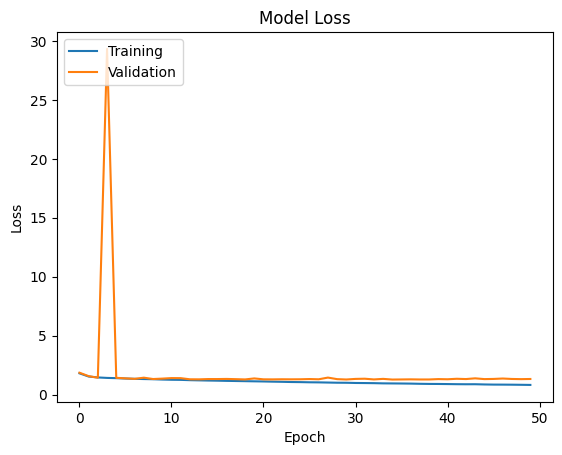

In [29]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [8]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),   
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 200)               3

In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)



# Train the model
epochs=100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
226/226 [==============================] - 45s 193ms/step - loss: 2.0604 - accuracy: 0.2997 - val_loss: 1.7620 - val_accuracy: 0.3036
Epoch 2/100
226/226 [==============================] - 44s 193ms/step - loss: 1.6234 - accuracy: 0.3926 - val_loss: 1.6719 - val_accuracy: 0.3559
Epoch 3/100
226/226 [==============================] - 43s 192ms/step - loss: 1.5117 - accuracy: 0.4191 - val_loss: 1.5148 - val_accuracy: 0.4142
Epoch 4/100
226/226 [==============================] - 43s 192ms/step - loss: 1.4422 - accuracy: 0.4434 - val_loss: 1.4100 - val_accuracy: 0.4645
Epoch 5/100
226/226 [==============================] - 44s 193ms/step - loss: 1.4059 - accuracy: 0.4614 - val_loss: 1.3902 - val_accuracy: 0.4734
Epoch 6/100
226/226 [==============================] - 44s 193ms/step - loss: 1.3755 - accuracy: 0.4729 - val_loss: 1.3464 - val_accuracy: 0.4847
Epoch 7/100
226/226 [==============================] - 46s 202ms/step - loss: 1.3507 - accuracy: 0.4816 - val_loss: 1.3550 -

In [23]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    layers.BatchNormalization(),   
    layers.MaxPooling2D(3,3),
    layers.Dropout(0.3),
        
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3,3),
    layers.Dropout(0.3),
    
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3,3),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_28 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_29 (Bat  (None, 16, 16, 64)      

Epoch 1/120
226/226 [==============================] - 34s 147ms/step - loss: 2.1512 - accuracy: 0.2021 - val_loss: 1.9071 - val_accuracy: 0.1960
Epoch 2/120
226/226 [==============================] - 33s 144ms/step - loss: 1.8660 - accuracy: 0.2503 - val_loss: 1.8913 - val_accuracy: 0.2668
Epoch 3/120
226/226 [==============================] - 33s 148ms/step - loss: 1.7066 - accuracy: 0.3241 - val_loss: 1.6846 - val_accuracy: 0.3238
Epoch 4/120
226/226 [==============================] - 35s 155ms/step - loss: 1.6209 - accuracy: 0.3623 - val_loss: 1.5069 - val_accuracy: 0.4233
Epoch 5/120
226/226 [==============================] - 32s 139ms/step - loss: 1.5615 - accuracy: 0.3937 - val_loss: 1.6621 - val_accuracy: 0.3555
Epoch 6/120
226/226 [==============================] - 33s 144ms/step - loss: 1.5226 - accuracy: 0.4099 - val_loss: 1.4534 - val_accuracy: 0.4363
Epoch 7/120
226/226 [==============================] - 33s 147ms/step - loss: 1.4794 - accuracy: 0.4289 - val_loss: 1.5803 -

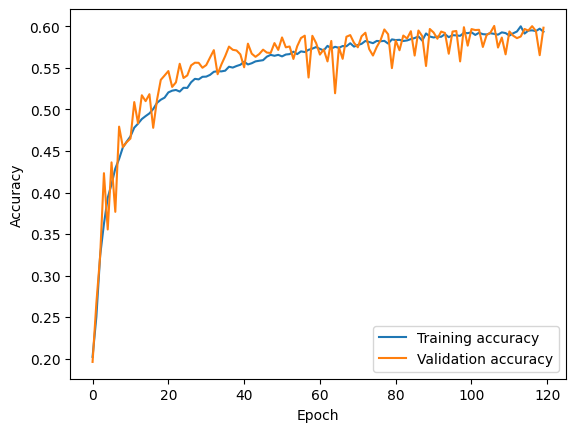

In [24]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)



# Train the model
epochs=120
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print("Validation accuracy:", test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

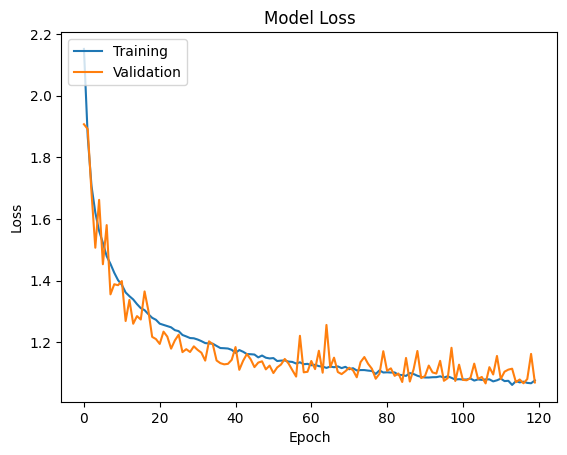

In [25]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()